In [1]:

import sys
import os


# Backup the original stdout and stderr
original_stdout = sys.stdout
original_stderr = sys.stderr

# Redirect stdout and stderr to null
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

import bpy

Device with name Apple M1 supports metal minimum requirements
METAL API - DETECTED GPU: Apple M1
Fra:1 Mem:63.58M (Peak 64.23M) | Time:00:00.09 | Syncing Light
Fra:1 Mem:63.58M (Peak 64.23M) | Time:00:00.09 | Syncing Camera
Fra:1 Mem:63.59M (Peak 64.23M) | Time:00:00.09 | Syncing 7TYG
Fra:1 Mem:75.27M (Peak 78.40M) | Time:00:00.12 | Rendering 1 / 64 samples
Fra:1 Mem:66.02M (Peak 78.40M) | Time:00:00.34 | Rendering 26 / 64 samples
Fra:1 Mem:66.02M (Peak 78.40M) | Time:00:00.51 | Rendering 51 / 64 samples
Fra:1 Mem:66.02M (Peak 78.40M) | Time:00:00.60 | Rendering 64 / 64 samples
Saved: 'test.png'
 Time: 00:00.73 (Saving: 00:00.12)

Fra:1 Mem:64.33M (Peak 64.76M) | Time:00:00.01 | Syncing Light
Fra:1 Mem:64.33M (Peak 64.76M) | Time:00:00.01 | Syncing Camera
Fra:1 Mem:64.34M (Peak 64.76M) | Time:00:00.01 | Syncing 7TYG
Fra:1 Mem:75.97M (Peak 79.10M) | Time:00:00.01 | Rendering 1 / 64 samples
Fra:1 Mem:66.59M (Peak 79.10M) | Time:00:00.21 | Rendering 26 / 64 samples
Fra:1 Mem:66.65M (Peak 

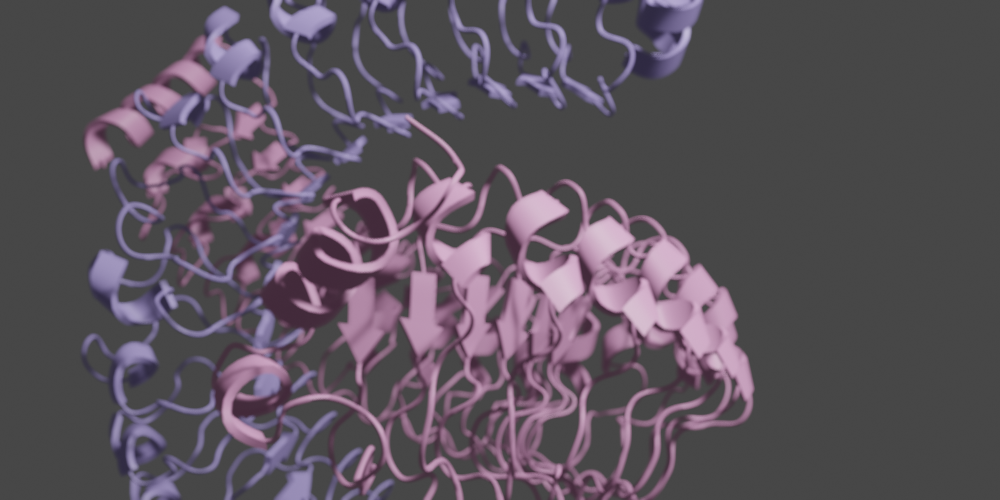

In [3]:


import molecularnodes as mn
import bpy
from IPython.display import display, Image




# Delete all mesh objects from the scene
bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()

molecule = mn.load.molecule_rcsb("7TYG", starting_style="cartoon", center_molecule=True)
# molecule = mn.load.molecule_rcsb("7TYG", starting_style="ball_and_stick", center_molecule=True)

scale = 4

molecule.location.z += 1.3
molecule.location.x += 1.3

molecule.scale = [scale, scale, scale]

# Camera
camera = bpy.data.objects["Camera"]
camera.location = (5, -3, 4)
camera.data.dof.use_dof = True
camera.data.dof.focus_distance = 2
camera.data.dof.aperture_fstop = 4

# Render
path = "test.png"
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 500
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)


# Restore the original stdout and stderr
# sys.stdout = original_stdout
# sys.stderr = original_stderr


# Display the image without any text output
display(Image(filename="test.png"))